In [1]:
import sys, os
import numpy as np
from pyhdf.SD import SD
import pandas as pd
from datetime import datetime, time, timedelta
import re
import time
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import pearsonr
import geopy
from matplotlib.patches import Ellipse
from functions import *
# Path and Variable declarations
# External harddrive path
file_ext= "D:\\NASA_AIRS"
file_path_plots=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\Plots"
# Internal testing folder
file_wind=r"C:\Users\Zelda64\Documents\Programming\dust_solar_power\ElPaso_Wind_2019.csv"
#sort file list

folder_year_list=sorted(os.listdir(file_ext))

# Coordinates for TECQ stations
CAMS49 = [31.6676,-106.288]
CAMS1028 = [33.5856, -101.78]

In [2]:
wind_spd_dir=pd.read_csv(file_wind, header=[4], index_col=0, engine="python", nrows=365, na_values="M")
wind_spd_dir.drop(wind_spd_dir.columns[2], axis=1, inplace=True)
wind_spd_dir

Mean Wind Speed (mph)  Mean Wind Dir (deg)
Date                                                  
2019-01-01                    7.8                 68.1
2019-01-02                    7.1                 19.3
2019-01-03                    5.1                217.3
2019-01-04                    3.7                 17.1
2019-01-05                    3.2                 11.1
...                           ...                  ...
2019-12-27                    8.2                325.3
2019-12-28                   14.3                270.5
2019-12-29                   13.8                284.7
2019-12-30                    7.4                 16.2
2019-12-31                    7.1                 12.5

[365 rows x 2 columns]

In [3]:
def points_inside_ellipse(center_cams, center_windv, semi_major_axis, semi_minor_axis, points):
    """Find points inside the given ellipse.
    center_cams is constant and based on which CAMS TCEQ ground station we want to use as a reference point
    center_windv is based on wind speed and direction and can take a position in a circle around center_cams
    while its distance depends on how far wind has carried dust in an hour

    
    """
    
    inside_points_dist = np.array([(distance(center_cams, point) + distance(center_windv, point)) for point in points])
    print(inside_points_dist)
    inside_points = points[inside_points_dist <= 2 * semi_major_axis]
    '''
    for point in points:
        # Calculate the distance from each point to the two foci of the ellipse
        distance_to_foci = distance(center_cams, point) + distance(center_windv, point)
        # Check if the sum of distances is less than or equal to the major axis
        if distance_to_foci <= 2 * semi_major_axis:
            inside_points.append(point)
    '''
    return inside_points
'''
def draw_helper_lines(ax, wind_dir, center_cams, center_windv, semi_major_axis, semi_minor_axis):
    center_distance= distance(center_windv,center_cams)/2
    lat_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=center_distance*np.sin(np.radians(wind_dir))))
    long_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=center_distance*np.cos(np.radians(wind_dir))))
    center_ellipse=[center_cams[0]+lat_deg_change,center_cams[1]+long_deg_change]
    ellipse=Ellipse(xy=center_ellipse, width=semi_minor_axis, height=semi_major_axis, angle=wind_dir)
    ax.add_patch(ellipse)
    # Set aspect of the plot to 'equal' to make sure the ellipse is not distorted
    ax.set_aspect('equal')
    plt.show()
'''
#def points_between_ellipses

"\ndef draw_helper_lines(ax, wind_dir, center_cams, center_windv, semi_major_axis, semi_minor_axis):\n    center_distance= distance(center_windv,center_cams)/2\n    lat_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=center_distance*np.sin(np.radians(wind_dir))))\n    long_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=center_distance*np.cos(np.radians(wind_dir))))\n    center_ellipse=[center_cams[0]+lat_deg_change,center_cams[1]+long_deg_change]\n    ellipse=Ellipse(xy=center_ellipse, width=semi_minor_axis, height=semi_major_axis, angle=wind_dir)\n    ax.add_patch(ellipse)\n    # Set aspect of the plot to 'equal' to make sure the ellipse is not distorted\n    ax.set_aspect('equal')\n    plt.show()\n"

Opening folder: D:\NASA_AIRS\2019
Opening file: D:\NASA_AIRS\2019\AIRS.2019.01.02.199.L1B.AIRS_Rad.v5.0.23.0.G19003105051.hdf
UTC:  2019-01-02 21:00:00
MST:  2019-01-02 14:00:00
CST:  2019-01-02 15:00:00
7.1
160
[  0.   14.2  28.4  42.6  56.8  71.   85.2  99.4 113.6 127.8 142.  156.2]
Time of satellite data capture:  2019-01-02 14:00:00
(31.6676, -106.288)
[1953.99519536 1947.15319405 1941.64130586 ... 1964.83275866 2003.03577586
 2044.14273694]
No points found between circles, drawing next circle...
(31.754514704160226, -106.10161081543436)
[1959.47632435 1952.35392007 1946.56600338 ... 1952.99513305 1991.14545354
 2032.20056788]
Points found inside first circle, size:  (3, 2)
Hello


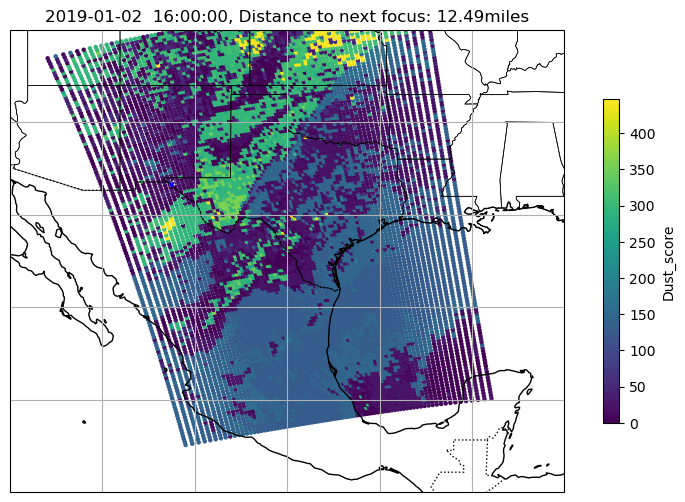

draw_grid_plot execution time: 0.8271872997283936 msec
(31.841429408320447, -105.91522163086871)
[1965.10176247 1957.70294687 1951.64270405 ... 1941.17379817 1979.2702248
 2020.27236155]
Points found inside first circle, size:  (14, 2)
Hello


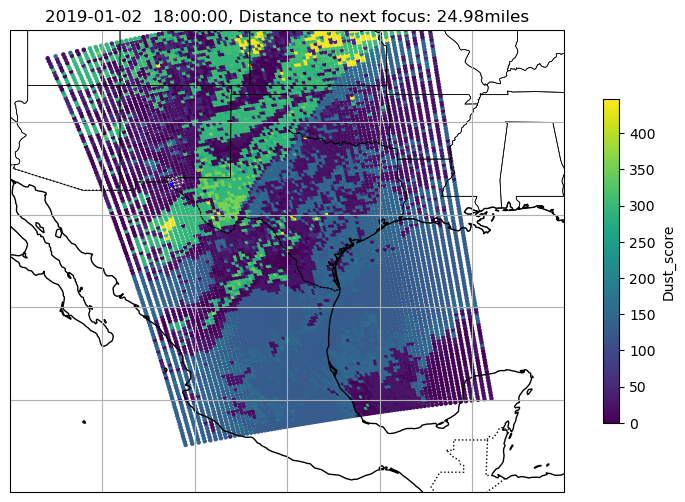

draw_grid_plot execution time: 0.40009045600891113 msec
(31.928344112480673, -105.72883244630307)
[1970.86872823 1963.19753898 1956.86872991 ... 1929.36907649 1967.41036631
 2008.35835236]
Points found inside first circle, size:  (32, 2)
Hello


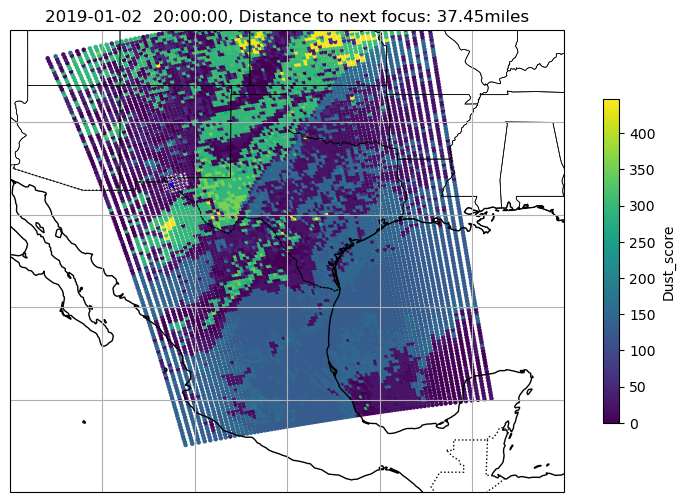

draw_grid_plot execution time: 0.40609192848205566 msec
(32.015258816640895, -105.54244326173743)
[1976.77444172 1968.83495498 1962.24138948 ... 1917.58130461 1955.56616654
 1996.45878433]
Points found inside first circle, size:  (58, 2)
Hello


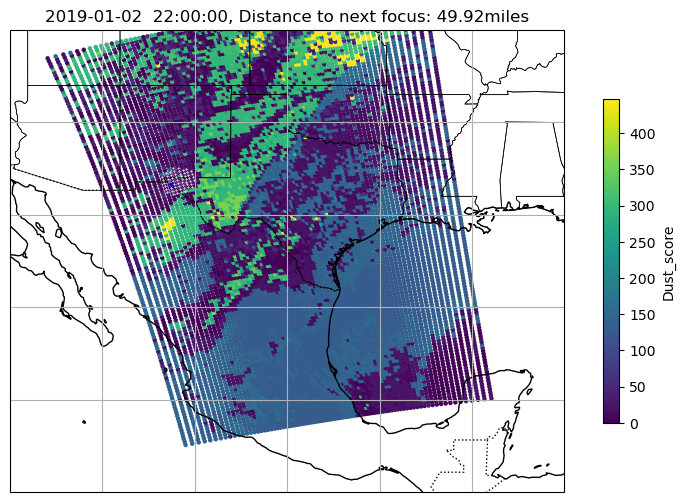

draw_grid_plot execution time: 0.4070923328399658 msec
(32.102173520801124, -105.35605407717179)
[1982.81612849 1974.61245162 1967.75798216 ... 1905.81083414 1943.73792642
 1984.5739117 ]
Points found inside first circle, size:  (96, 2)
Hello


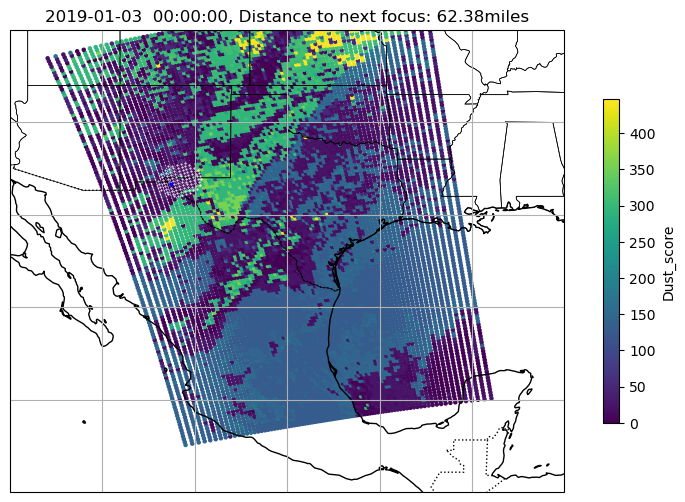

draw_grid_plot execution time: 0.4070925712585449 msec
(32.189088224961345, -105.16966489260615)
[1988.99102309 1980.52728772 1973.41580234 ... 1894.05803253 1931.92596011
 1972.70399949]
Points found inside first circle, size:  (136, 2)
Hello


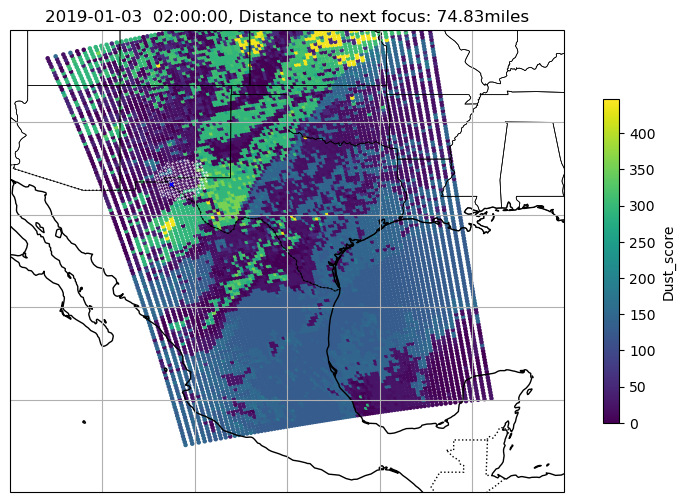

draw_grid_plot execution time: 0.4070923328399658 msec
(32.27600292912157, -104.98327570804051)
[1995.29637251 1986.57672786 1979.21214337 ... 1882.32328413 1920.13059577
 1960.8493242 ]
Points found inside first circle, size:  (189, 2)
Hello


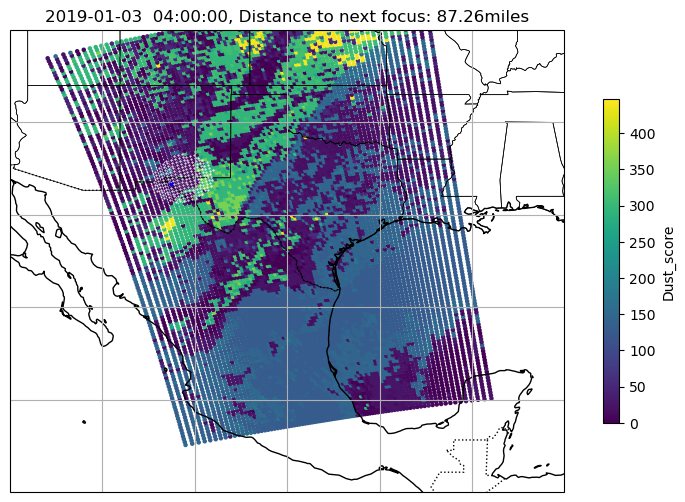

draw_grid_plot execution time: 0.5001132488250732 msec
(32.362917633281796, -104.79688652347487)
[2001.72943931 1992.75804583 1985.14430134 ... 1870.60699113 1908.35217646
 1949.01017442]
Points found inside first circle, size:  (246, 2)
Hello


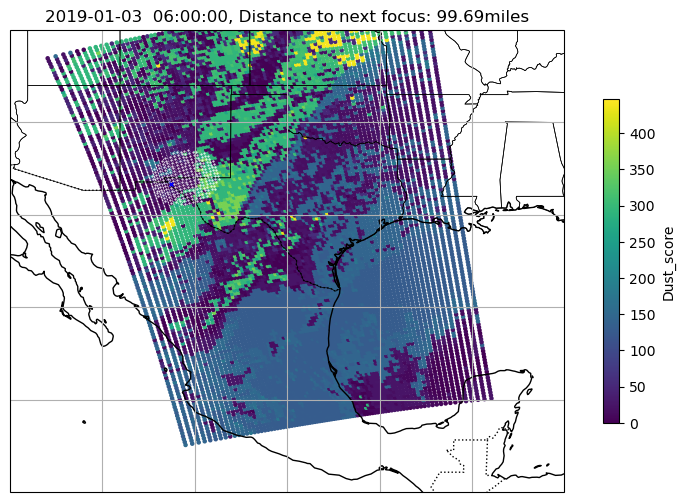

draw_grid_plot execution time: 0.40609192848205566 msec
(32.44983233744202, -104.61049733890923)
[2008.28750458 1999.06852794 1991.20957857 ... 1858.90957475 1896.59106098
 1937.18685161]
Points found inside first circle, size:  (319, 2)
Hello


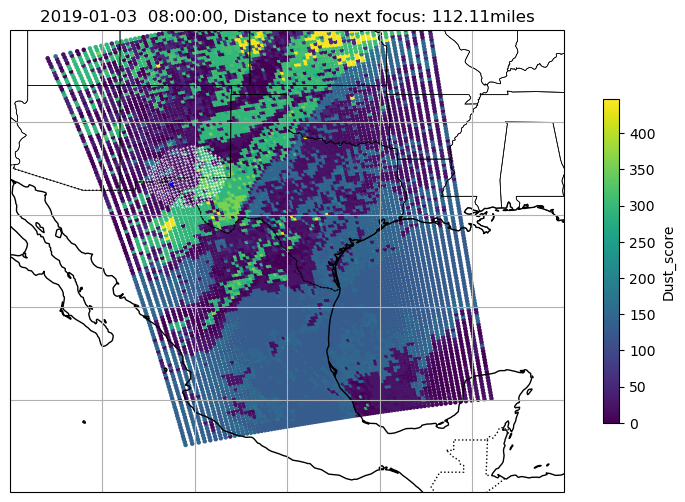

draw_grid_plot execution time: 0.4050915241241455 msec
(32.53674704160224, -104.42410815434359)
[2014.96787066 2005.50547605 1997.40528704 ... 1847.2314764  1884.84762492
 1925.37967089]
Points found inside first circle, size:  (409, 2)
Hello


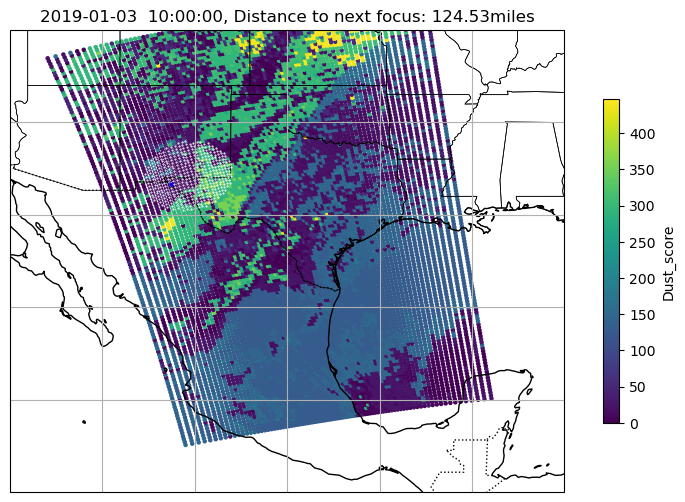

draw_grid_plot execution time: 0.4120934009552002 msec
(32.62366174576246, -104.23771896977794)
[2021.76786368 2012.06621041 2003.72875148 ... 1835.57315894 1873.12226167
 1913.58896185]
Points found inside first circle, size:  (499, 2)
Hello


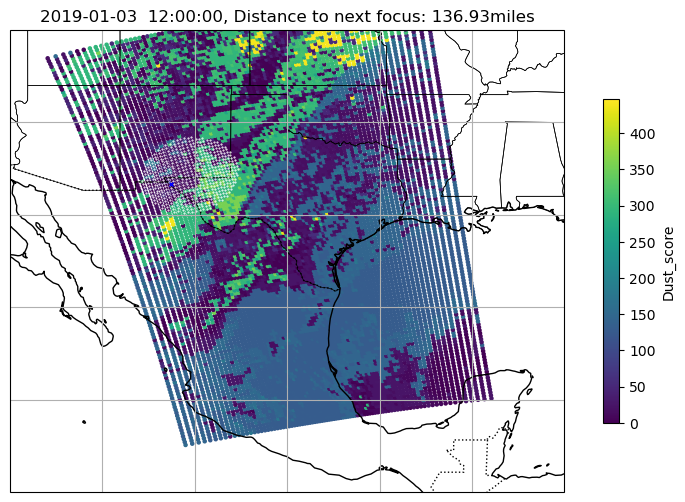

draw_grid_plot execution time: 0.4120926856994629 msec
Done
HDF file execution time: 10.692420244216919 sec


Opening file: D:\NASA_AIRS\2019\AIRS.2019.01.03.080.L1B.AIRS_Rad.v5.0.23.0.G19003122752.hdf
UTC:  2019-01-03 08:00:00
MST:  2019-01-03 01:00:00
CST:  2019-01-03 02:00:00
5.1
37
[  0.   10.2  20.4  30.6  40.8  51.   61.2  71.4  81.6  91.8 102.  112.2]
Time of satellite data capture:  2019-01-03 01:00:00
(31.6676, -106.288)
[3062.04220686 3015.29717315 2971.54444134 ... 2115.49554165 2101.46022004
 2087.46753641]
No points found between circles, drawing next circle...
(31.521311697775626, -106.3085594801018)
[3066.24098886 3019.54567014 2975.84073816 ... 2105.96474635 2091.85615166
 2077.78909706]
No points found between circles, drawing next circle...
(31.375023395551253, -106.32911896020362)
[3070.49634754 3023.85137431 2980.19483805 ... 2096.44711378 2082.26392846
 2068.12112957]
No points found between circles, drawing next circle...
(31.228735093326875, -106.34967844030542)



KeyboardInterrupt



In [4]:
# Create a dataframe for the 2019 to 2021 period for radial measurements
date_index = pd.date_range(start='2019-01-01', end='2021-12-31', freq='D')
time_of_day = pd.date_range(start='2019-01-01', periods=24, freq='H').time
dust_score_stats_CAMS49 = pd.DataFrame(index=date_index, columns=time_of_day)


for year in folder_year_list:
    
    file_path_ext=os.path.join(file_ext,year)
    file_list=sorted(os.listdir(os.path.join(file_ext,file_path_ext)))[1:]
    print("Opening folder:", file_path_ext)

    
    file_name_cams49=f'CAMS49_{year}.xlsx'
    file_name_cams1028=f'CAMS1028_{year}.xlsx'
    tecq_cams49=read_xlsx_tecq(file_name_cams49)
    tecq_cams1028=read_xlsx_tecq(file_name_cams1028)

    last_ending_time_cams49=datetime(1900,1,1)
    
    for file in file_list[4:]:
        start_time=time.time()
        file_path=os.path.join(file_path_ext,file)
        print("Opening file:", file_path)
        
        try:
            hdf_file = SD(file_path)
            # Select dust_score, lat and long     
            dust_score=hdf_file.select('dust_score')[:]
            long=hdf_file.select('Longitude')[:]
            lat=hdf_file.select('Latitude')[:]
            coords=coordinates(lat,long)
            # Find timestamp of production
            global_attributes = hdf_file.attributes()
            # Get raw productiondatetime from hdf file
            datetime_hdf_raw=find_rangedatetime(global_attributes)
            # Convert raw string into datetime object
            datetime_converted=datetime.strptime(datetime_hdf_raw,"%Y-%m-%dT%H:%M:%S.%fZ")
            # Round time from converted hdf datetime object to nearest hour 
            datetime_rounded_time=round_nearest_hour(datetime_converted)

                
            print("UTC: ",datetime_rounded_time)
            # Convert UTC to MST (only valid for CAMS49)
            datetime_rounded_time_mst=datetime_rounded_time-timedelta(hours=7)
            datetime_rounded_time_cst=datetime_rounded_time-timedelta(hours=6)
            print("MST: ",datetime_rounded_time_mst)
            print("CST: ",datetime_rounded_time_cst)

            # Convert datetime object (date part only) into string
            datetime_converted_str_mst=datetime_rounded_time_mst.date().strftime("%Y-%m-%d")
            datetime_converted_str_cst=datetime_rounded_time_cst.date().strftime("%Y-%m-%d")
            
            # Use the date string to find the matching date row in the TECQ file
            tecq_date_found_cams49=tecq_cams49.loc[datetime_converted_str_mst]
            tecq_date_found_cams1028=tecq_cams1028.loc[datetime_converted_str_cst]
            
            # Make an array of an hour before and after the flyby's rounded hour
            datetime_range_mst=[(datetime_rounded_time_mst-timedelta(hours=1)).time(), (datetime_rounded_time_mst.time()), (datetime_rounded_time_mst+timedelta(hours=1)).time()]
            datetime_range_cst=[(datetime_rounded_time_cst-timedelta(hours=1)).time(), (datetime_rounded_time_cst.time()), (datetime_rounded_time_cst+timedelta(hours=1)).time()]
            # Find the mean PM concentration at time of satellite flyby at TECQ station
            tecq_pm_hourmean_cams49=np.mean(tecq_date_found_cams49[datetime_range_mst])
            tecq_pm_hourmean_cams1028=np.mean(tecq_date_found_cams1028[datetime_range_cst])


            perhour =1
            per2hours=2
            
            avg_windspd_cams1028=17
            #Wind speed on certain day of the year as measured at El Paso airport, only 2019 data so far!
            avg_windspd_cams49=round(wind_spd_dir.at[datetime_rounded_time_mst.strftime('%Y-%m-%d'),'Mean Wind Speed (mph)'],2)
            print(avg_windspd_cams49)
            avg_winddir_cams49=wind_spd_dir.at[datetime_rounded_time_mst.strftime('%Y-%m-%d'),'Mean Wind Dir (deg)']
            #wind direction given in the csv refers to direction wind is coming from, but for the ellipse function we want
            #to know the direction where the wind is goin, so we subtract from pi/2 and get the absolute value
            #south is 0deg
            avg_winddir_cams49=int(np.abs(180-avg_winddir_cams49))
            print(avg_winddir_cams49)
            
            windspd_radii_cams1028=np.arange(2,24*avg_windspd_cams1028,avg_windspd_cams1028*2)
            #Draw circle every 2 hours for 12 hours, until next satellite obesrvation (which could be on the same or the next day)
            windspd_radii_cams49=np.arange(0,24*avg_windspd_cams49,avg_windspd_cams49*per2hours)
            print(windspd_radii_cams49)
            #match coordinates closest to tecq stations?
            
            #for radius=0 find mean/mode/median as close as possible to cams station
            coords_reshaped=np.reshape(coords,(coords.shape[0]*coords.shape[1],2))
            observation_starting_time_cams49=datetime_rounded_time_mst
            print("Time of satellite data capture: ", observation_starting_time_cams49)
            
            for elem in range(len(windspd_radii_cams49)):
                #if len(points_inside_circle(CAMS49, np.max(windspd_radii_cams49), coords_reshaped))==0:
                    #print(f'No points found within the maximum distance of {np.max(windspd_radii_cams49)}mi from {'CAMS49'}, skipping...')
                    #break
                if last_ending_time_cams49>=observation_starting_time_cams49:
                    print("Warning: datetime overlap!")
                '''
                inner_radius = windspd_radii_cams49[elem]  # Inner circle radius in miles
                #Outer radius will be the distance dust could have spread away from CAMS49 coordinates in 2 hours based on avg windspeed
                outer_radius = windspd_radii_cams49[elem]+avg_windspd_cams49*per2hours  # Outer circle radius in miles doubled since we are interested in change every 2 hours
                print(f"Looking for points between a circle of diameter {outer_radius} and a circle of diameter {inner_radius} miles")
                print("Hour of dust movement: ", observation_starting_time_cams49)
                # Points inside the first circle
                inside_points = points_inside_circle(CAMS49, inner_radius, coords_reshaped)
                '''
                semi_major_axis = int(windspd_radii_cams49[elem]) 
                semi_minor_axis = semi_major_axis/2
                #center_windv = (CAMS49[0], CAMS49[1] + 100 / (111.32 * np.cos(np.radians(CAMS49[0]))))
                lat_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=windspd_radii_cams49[elem]*np.sin(np.radians(avg_winddir_cams49)-np.abs(3/4*np.pi))))
                long_deg_change=geopy.units.degrees(arcminutes=geopy.units.nautical(miles=windspd_radii_cams49[elem]*np.cos(np.radians(avg_winddir_cams49)-np.abs(3/4*np.pi))))
                
                center_windv= (CAMS49[0]+lat_deg_change, CAMS49[1]+long_deg_change)
                
                print(center_windv)
                inside_points=points_inside_ellipse(CAMS49, center_windv, semi_major_axis, semi_minor_axis, coords_reshaped)
                if len(inside_points)!=0:
                    print("Points found inside first circle, size: ", inside_points.shape)
                    draw_grid_plot(CAMS49, coords, inside_points, file, observation_starting_time_cams49.strftime('%Y-%m-%d  %H:%M:%S'), dust_score, round(distance(center_windv,CAMS49),2), 
                                   True, avg_winddir_cams49, center_windv, semi_major_axis, semi_minor_axis)
                    # Points between the circles
                    '''
                    between_points = points_between_circles(CAMS49, inner_radius, outer_radius, coords_reshaped)
                    if len(between_points)!=0:
                        matched_circle_coords=match_coords_circle(coords, between_points)
                        print("Points found between the two circles, size: ", between_points.shape)
                        #print(between_points)
                        dust_score_mean_between_points=np.mean(dust_score[matched_circle_coords])
                        print(dust_score_mean_between_points)
                        print(observation_starting_time_cams49)
                        print(observation_starting_time_cams49+timedelta(hours=1))
                        dust_score_stats_CAMS49.at[observation_starting_time_cams49.strftime('%Y-%m-%d'), observation_starting_time_cams49.time()]=dust_score_mean_between_points
                        #copy for next hour since circle expands every two hours, so we assume same value.
                        #next_hour=observation_starting_time_cams49+timedelta(hours=1)
                        #dust_score_stats_CAMS49.at[observation_starting_time_cams49.strftime('%Y-%m-%d'), next_hour.time()]=dust_score_mean_between_points
                        print(dust_score_stats_CAMS49.loc[observation_starting_time_cams49.strftime('%Y-%m-%d')][observation_starting_time_cams49.time()])
                        print(dust_score_stats_CAMS49.loc[observation_starting_time_cams49.strftime('%Y-%m-%d')][(observation_starting_time_cams49+timedelta(hours=1)).time()])
                        print(dust_score_stats_CAMS49.loc['2019-01-01'].iloc[0])
                        #draw_grid_plot(CAMS49, coords, inside_points, file, observation_starting_time_cams49.strftime('%Y-%m-%d  %H:%M:%S'), dust_score, outer_radius, between_points)
                        #update the last_ending_time with the latest time written into the dataframe
                        last_ending_time_cams49=observation_starting_time_cams49
                    '''
                else:
                    print("No points found between circles, drawing next circle...")
                observation_starting_time_cams49+=timedelta(hours=per2hours)
            print("Done")
            #draw_grid_plot(CAMS49, coords, coords[mask_cams49], file, datetime_converted_str_mst, dust_score)
            
            '''
                if dust_score_max>380:
                    print("Found dust_score above 380, printing plot...")
                    draw_grid_plot(coords, coords_masked, file, datetime_hdf_raw, dust_score)
            '''
            
            # Close the HDF4 file
            hdf_file.end()
        except Exception as e:
            print("Error opening file:", file_path)
            print(e)
            print("\n")
        end_time=time.time()
        runtime = end_time - start_time
        print(f"HDF file execution time: {runtime} sec")
        print("\n")
    break
break        
    
'''
if __name__ == "__main__":
'''

In [ ]:
dust_score_stats_CAMS49

In [ ]:
'''
def plot_dust_pm(type: str, threshold_pm: int, threshold_dust_score: int, dust_score_pm_matches_array: list, additional_array: list = None):
    index_year_2019=dust_score_pm_matches_array.index(['2019', '2019'])
    index_year_2020=dust_score_pm_matches_array.index(['2020', '2020'])

    dust_score_pm_matches_2019=np.array(dust_score_pm_matches_array[index_year_2019+1:index_year_2020])
    dust_score_pm_matches_2020=np.array(dust_score_pm_matches_array[index_year_2020+1:])

    if additional_array is not None:
        
        index_year_2019_add=additional_array.index(['2019', '2019'])
        index_year_2020_add=additional_array.index(['2020', '2020'])
        additional_array_2019=np.array(additional_array[index_year_2019_add+1:index_year_2020_add])
        additional_array_2020=np.array(additional_array[index_year_2020_add+1:]) 
        dust_score_pm_matches_2019=np.concatenate((dust_score_pm_matches_2019,additional_array_2019), axis=0)
        dust_score_pm_matches_2020=np.concatenate((dust_score_pm_matches_2020,additional_array_2020), axis=0)

    mask_matches_2019=np.isnan(dust_score_pm_matches_2019).any(axis=1)
    mask_matches_2020=np.isnan(dust_score_pm_matches_2020).any(axis=1)
    
    dust_score_pm_matches_2019=dust_score_pm_matches_2019[~mask_matches_2019]
    dust_score_pm_matches_2020=dust_score_pm_matches_2020[~mask_matches_2020]
    
    dust_score_pm_matches_2020_filtered=dust_score_pm_matches_2020[np.logical_and(dust_score_pm_matches_2020[:,0]>threshold_pm, dust_score_pm_matches_2020[:,1]>threshold_dust_score)]
    dust_score_pm_matches_2019_filtered=dust_score_pm_matches_2019[np.logical_and(dust_score_pm_matches_2019[:,0]>threshold_pm, dust_score_pm_matches_2019[:,1]>threshold_dust_score)]
    print(dust_score_pm_matches_2019_filtered.shape)
    print(dust_score_pm_matches_2020_filtered.shape)
    

    x_pm_2019=dust_score_pm_matches_2019_filtered[:,0]
    y_dust_score_2019=dust_score_pm_matches_2019_filtered[:,1]
    
    x_pm_2020=dust_score_pm_matches_2020_filtered[:,0]
    y_dust_score_2020=dust_score_pm_matches_2020_filtered[:,1]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    
    ax.scatter(x_pm_2019,y_dust_score_2019, marker='.', label='2019')
    ax.scatter(x_pm_2020,y_dust_score_2020, marker='.', label='2020')
        
    # Add title and show the plot
    plt.title(f'{type} PM from CAMS49/1028 plotted with AIRS Dust_score')
    plt.xlabel("PM2.5 (µg/m3)")
    plt.ylabel("Dust_score")
    plt.legend()
    plt.show()

    corr_coefficient_2019, p_value_2019 = pearsonr(x_pm_2019, y_dust_score_2019)
    corr_coefficient_2020, p_value_2020 = pearsonr(x_pm_2020, y_dust_score_2020)
    corr_coefficient_comb, p_vale_comb = pearsonr(np.concatenate((x_pm_2019,x_pm_2020)), np.concatenate((y_dust_score_2019,y_dust_score_2020)))
    print("Pearson correlation coefficient 2019 data:", corr_coefficient_2019.round(3))
    print("p-value:", p_value_2019.round(3))
    print("Pearson correlation coefficient 2020 data:", corr_coefficient_2020.round(3))
    print("p-value:", p_value_2020.round(3))
    print("Pearson correlation coefficient 2019 and 2020 data:", corr_coefficient_comb.round(3))
    print("p-value:", p_vale_comb.round(3))

    plt.hist(x_pm_2019, alpha=0.5, label='PM2.5 2019')
    plt.hist(x_pm_2020, alpha=0.5, label='PM2.5 2020')
    plt.hist(y_dust_score_2019, alpha=0.5, label='Dust_score 2019')
    plt.hist(y_dust_score_2020, alpha=0.5, label='Dust_score 2020')
    
    plt.xlabel('PM2.5 & Dust_score Values')
    plt.ylabel('Frequency')
    plt.title('Max PM2.5 & Dust_score Data Distribution')
    
    plt.legend()
        
plot_dust_pm('Mean', 20, 0,dust_score_pm_matches_cams1028,dust_score_pm_matches_cams49)

'''